# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

Since we're trying to predict a number, this kind of problem is known as a regression problem.

The data and evaluation metric we'll be using (root mean square log error or RMSLE) is from the Kaggle Bluebook for Bulldozers competition.

## 1. Problem Definition
For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

> How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

## 2. Data
In this case, it's historical sales data of bulldozers. Including things like, model type, size, sale date and more.

There are 3 datasets:

1. Train.csv - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the target variable).
2. Valid.csv - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as Train.csv).
3. Test.csv - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).

## 3. Evaluation
For this problem, Kaggle has set the evaluation metric to being root mean squared log error (RMSLE). As with many regression evaluations, the goal will be to get this value as low as possible.

To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the Kaggle leaderboard.

## 4. Features
Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

For this dataset, Kaggle provide a data dictionary which contains information about what each attribute of the dataset means. You can download this file directly from the Kaggle competition page (account required) or view it on Google Sheets.

With all of this being known, let's get started!

First, we'll import the dataset and start exploring. Since we know the evaluation metric we're trying to minimise, our first goal will be building a baseline model and seeing how it stacks up against the competition.

## Importing the data and preparing it for modelling

In [1]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the training and validation set
df = pd.read_csv("TrainAndValid.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# No parse_dates... check dtype of "saledate"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39562 entries, 0 to 39561
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   39562 non-null  int64  
 1   SalePrice                 39562 non-null  int64  
 2   MachineID                 39562 non-null  int64  
 3   ModelID                   39562 non-null  int64  
 4   datasource                39562 non-null  int64  
 5   auctioneerID              39562 non-null  int64  
 6   YearMade                  39562 non-null  int64  
 7   MachineHoursCurrentMeter  24731 non-null  float64
 8   UsageBand                 21805 non-null  object 
 9   saledate                  39562 non-null  object 
 10  fiModelDesc               39562 non-null  object 
 11  fiBaseModel               39561 non-null  object 
 12  fiSecondaryDesc           24421 non-null  object 
 13  fiModelSeries             3823 non-null   object 
 14  fiMode

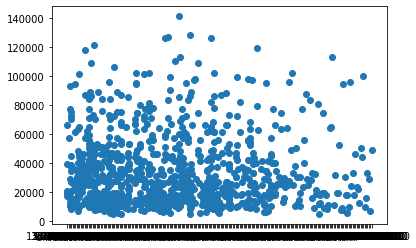

In [10]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [8]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    14831
UsageBand                   17757
saledate                        0
fiModelDesc                     0
fiBaseModel                     1
fiSecondaryDesc             15141
fiModelSeries               35739
fiModelDescriptor           32935
ProductSize                 25110
fiProductClassDesc              1
state                           1
ProductGroup                    1
ProductGroupDesc                1
Drive_System                28208
Enclosure                      19
Forks                       14992
Pad_Type                    29704
Ride_Control                23960
Stick                       29704
Transmission                22938
Turbocharged                29704
Blade_Extension             38069
Blade_Width   

In [12]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

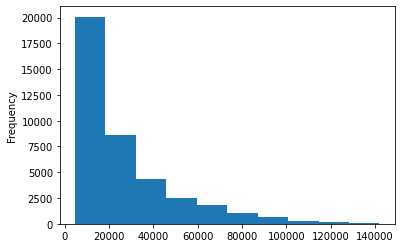

In [13]:
df.SalePrice.plot.hist()

**Parsing dates**

When working with time series data, it's a good idea to make sure any date data is the format of a datetime object (a Python data type which encodes specific information about dates).

In [16]:
# import data again but this time parse dates
df = pd.read_csv("TrainAndValid.csv",
                 low_memory=False,parse_dates=["saledate"])

In [19]:
df.saledate.dtype

dtype('<M8[ns]')

In [20]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

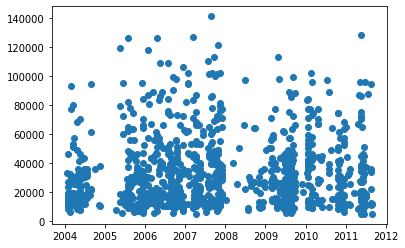

In [21]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [22]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157.0,121.0,3.0,2004.0,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77.0,121.0,3.0,1996.0,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009.0,121.0,3.0,2001.0,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332.0,121.0,3.0,2001.0,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311.0,121.0,3.0,2007.0,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [24]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

**Sort DataFrame by saledate**

As we're working on a time series problem and trying to predict future examples given past examples, it makes sense to sort our data by date.

In [25]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
127610   1989-01-31
205784   1989-01-31
92803    1989-01-31
88803    1989-01-31
32138    1989-01-31
142491   1989-01-31
63155    1989-01-31
77792    1989-01-31
86971    1989-01-31
81383    1989-01-31
113547   1989-01-31
113454   1989-01-31
92833    1989-01-31
63166    1989-01-31
63167    1989-01-31
140922   1989-01-31
113394   1989-01-31
205782   1989-01-31
101796   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [26]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500,1126363,8434.0,132.0,18.0,1974.0,NaN,NaN,1989-01-17,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
127610,1475641,23500,1194367,7277.0,132.0,99.0,1973.0,NaN,NaN,1989-01-31,950,950,NaN,NaN,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
205784,1647221,15000,1476216,8443.0,132.0,99.0,1979.0,NaN,NaN,1989-01-31,40,40,NaN,NaN,NaN,Small,"Hydraulic Excavator, Track - 16.0 to 19.0 Metr...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Triple,NaN,NaN,NaN,NaN,NaN
92803,1404019,24000,1169900,7110.0,132.0,99.0,1986.0,NaN,NaN,1989-01-31,416,416,NaN,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,BL,Backhoe Loaders,Two Wheel Drive,EROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88803,1394449,39000,1212304,7001.0,132.0,99.0,1982.0,NaN,NaN,1989-01-31,215,215,NaN,NaN,NaN,Small,"Hydraulic Excavator, Track - 16.0 to 19.0 Metr...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


**Make a copy of the original DataFrame**

Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [27]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [31]:
df_tmp.head().T

,205615,127610,205784,92803,88803
SalesID,1646770,1475641,1647221,1404019,1394449
SalePrice,9500,23500,15000,24000,39000
MachineID,1126363,1194367,1476216,1169900,1212304
ModelID,8434,7277,8443,7110,7001
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1973,1979,1986,1982
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


**Add datetime parameters for saledate column**

In [32]:
# Add datetime parameters for saledate
# Adding columns  
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofweek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofyear"] = df_tmp.saledate.dt.dayofyear

# Drop original saledate
df_tmp.drop("saledate", axis=1, inplace=True)

In [35]:
df[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int64

In [36]:
df[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int64

In [37]:
df[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [39]:
df_tmp.head().T

,205615,127610,205784,92803,88803
SalesID,1646770,1475641,1647221,1404019,1394449
SalePrice,9500,23500,15000,24000,39000
MachineID,1126363,1194367,1476216,1169900,1212304
ModelID,8434,7277,8443,7110,7001
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1973,1979,1986,1982
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,950,40,416,215


In [40]:
# Check the different values of different columns
df_tmp.state.value_counts()

Florida           54318
Texas             40394
California        22719
Washington        12112
Mississippi       11498
Georgia           11095
Ohio              10458
Maryland           9721
New Jersey         9697
Pennsylvania       9097
Illinois           8937
Alabama            8801
Colorado           8720
South Carolina     8355
North Carolina     8167
Tennessee          7869
New York           7609
Arizona            7116
Minnesota          6607
Connecticut        6606
Louisiana          5801
Nevada             5172
Missouri           5110
Maine              5055
Kentucky           4636
Indiana            3729
Arkansas           3369
Unspecified        2801
New Mexico         2684
New Hampshire      2543
Wisconsin          2300
Utah               2022
Virginia           1778
Idaho              1608
Wyoming            1580
Oregon             1522
Oklahoma           1153
Michigan           1051
Montana            1049
Iowa                938
Kansas              637
West Virginia   

In [43]:
len(df_tmp)

329671

**5. Modelling**

We know the evaluation metric we're heading towards. We could spend more time doing exploratory data analysis (EDA), finding more out about the data ourselves but what we'll do instead is use a machine learning model to help us do EDA.

In [41]:
# This won't work since we've got missing numbers and categories
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1)
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp.SalePrice)

ValueError: ignored

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329671 entries, 205615 to 329670
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   329671 non-null  int64         
 1   SalePrice                 329671 non-null  int64         
 2   MachineID                 329671 non-null  int64         
 3   ModelID                   329670 non-null  float64       
 4   datasource                329670 non-null  float64       
 5   auctioneerID              320315 non-null  float64       
 6   YearMade                  329670 non-null  float64       
 7   MachineHoursCurrentMeter  80095 non-null   float64       
 8   UsageBand                 40438 non-null   object        
 9   saledate                  329670 non-null  datetime64[ns]
 10  fiModelDesc               329670 non-null  object        
 11  fiBaseModel               329670 non-null  object        
 1

In [45]:
# Check for missing values
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          1
datasource                       1
auctioneerID                  9356
YearMade                         1
MachineHoursCurrentMeter    249576
UsageBand                   289233
fiModelDesc                      1
fiBaseModel                      1
fiSecondaryDesc             113022
fiModelSeries               287271
fiModelDescriptor           275157
ProductSize                 173348
fiProductClassDesc               1
state                            1
ProductGroup                     1
ProductGroupDesc                 1
Drive_System                241603
Enclosure                      271
Forks                       172715
Pad_Type                    263231
Ride_Control                206446
Stick                       263231
Transmission                175332
Turbocharged                263231
Blade_Extension             308050
Blade_Width         

In [46]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329671 entries, 205615 to 329670
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   329671 non-null  int64  
 1   SalePrice                 329671 non-null  int64  
 2   MachineID                 329671 non-null  int64  
 3   ModelID                   329670 non-null  float64
 4   datasource                329670 non-null  float64
 5   auctioneerID              320315 non-null  float64
 6   YearMade                  329670 non-null  float64
 7   MachineHoursCurrentMeter  80095 non-null   float64
 8   UsageBand                 40438 non-null   object 
 9   fiModelDesc               329670 non-null  object 
 10  fiBaseModel               329670 non-null  object 
 11  fiSecondaryDesc           216649 non-null  object 
 12  fiModelSeries             42400 non-null   object 
 13  fiModelDescriptor         54514 non-nul

## Convert strings to categories
One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

In [47]:
df_tmp.head().T

,205615,127610,205784,92803,88803
SalesID,1646770,1475641,1647221,1404019,1394449
SalePrice,9500,23500,15000,24000,39000
MachineID,1126363,1194367,1476216,1169900,1212304
ModelID,8434,7277,8443,7110,7001
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1973,1979,1986,1982
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,950,40,416,215


In [48]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [49]:
# These columns contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [50]:
# Dummy of above code 
random_dict = {"key1": "hello",
               "key2": "world!"}

for key, value in random_dict.items():
    print(f"This is a key: {key}")
    print(f"This is a value: {value}")

This is a key: key1
This is a value: hello
This is a key: key2
This is a value: world!


In [51]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [52]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329671 entries, 205615 to 329670
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   329671 non-null  int64   
 1   SalePrice                 329671 non-null  int64   
 2   MachineID                 329671 non-null  int64   
 3   ModelID                   329670 non-null  float64 
 4   datasource                329670 non-null  float64 
 5   auctioneerID              320315 non-null  float64 
 6   YearMade                  329670 non-null  float64 
 7   MachineHoursCurrentMeter  80095 non-null   float64 
 8   UsageBand                 40438 non-null   category
 9   fiModelDesc               329670 non-null  category
 10  fiBaseModel               329670 non-null  category
 11  fiSecondaryDesc           216649 non-null  category
 12  fiModelSeries             42400 non-null   category
 13  fiModelDescriptor       

In [53]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [54]:
df_tmp.state.cat.codes

205615    43
127610     8
205784     8
92803      8
88803      8
          ..
23972     43
23967     10
23971     43
23968      4
329670    -1
Length: 329671, dtype: int8

In [55]:
df_tmp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          1
datasource                       1
auctioneerID                  9356
YearMade                         1
MachineHoursCurrentMeter    249576
UsageBand                   289233
fiModelDesc                      1
fiBaseModel                      1
fiSecondaryDesc             113022
fiModelSeries               287271
fiModelDescriptor           275157
ProductSize                 173348
fiProductClassDesc               1
state                            1
ProductGroup                     1
ProductGroupDesc                 1
Drive_System                241603
Enclosure                      271
Forks                       172715
Pad_Type                    263231
Ride_Control                206446
Stick                       263231
Transmission                175332
Turbocharged                263231
Blade_Extension             308050
Blade_Width         

In [56]:
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000003
datasource                  0.000003
auctioneerID                0.028380
YearMade                    0.000003
MachineHoursCurrentMeter    0.757046
UsageBand                   0.877338
fiModelDesc                 0.000003
fiBaseModel                 0.000003
fiSecondaryDesc             0.342833
fiModelSeries               0.871387
fiModelDescriptor           0.834641
ProductSize                 0.525821
fiProductClassDesc          0.000003
state                       0.000003
ProductGroup                0.000003
ProductGroupDesc            0.000003
Drive_System                0.732861
Enclosure                   0.000822
Forks                       0.523901
Pad_Type                    0.798466
Ride_Control                0.626218
Stick                       0.798466
Transmission                0.531839
Turbocharged                0.798466
B

In [57]:
# Save preprocessed data
df_tmp.to_csv("train_tmp.csv",
              index=False)

In [58]:
# Import preprocessed data
df_tmp = pd.read_csv("train_tmp.csv",
                     low_memory=False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1475641,1647221,1404019,1394449
SalePrice,9500,23500,15000,24000,39000
MachineID,1126363,1194367,1476216,1169900,1212304
ModelID,8434,7277,8443,7110,7001
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1973,1979,1986,1982
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,950,40,416,215


In [59]:
# Check missing values
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          1
datasource                       1
auctioneerID                  9356
YearMade                         1
MachineHoursCurrentMeter    249576
UsageBand                   289233
fiModelDesc                      1
fiBaseModel                      1
fiSecondaryDesc             113022
fiModelSeries               287271
fiModelDescriptor           275157
ProductSize                 173348
fiProductClassDesc               1
state                            1
ProductGroup                     1
ProductGroupDesc                 1
Drive_System                241603
Enclosure                      271
Forks                       172715
Pad_Type                    263231
Ride_Control                206446
Stick                       263231
Transmission                175332
Turbocharged                263231
Blade_Extension             308050
Blade_Width         

## Fill missing values
From our experience with machine learning models. We know two things:

1. All of our data has to be numerical
2. There can't be any missing values

And as we've seen using df_tmp.isna().sum() our data still has plenty of missing values.

Let's fill them.

**Filling numerical values first**

We're going to fill any column with missing values with the median of that column.

In [60]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofweek
saleDayofyear


In [61]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofweek
saleDayofyear


In [62]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())

In [63]:
df_tmp.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
                           ..
saleYear_is_missing         0
saleMonth_is_missing        0
saleDay_is_missing          0
saleDayofweek_is_missing    0
saleDayofyear_is_missing    0
Length: 67, dtype: int64

In [64]:
# Check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

False    320315
True       9356
Name: auctioneerID_is_missing, dtype: int64

# Filling and turning categorical variables to numbers

Now we've filled the numeric values, we'll do the same with the categorical values at the same time as turning them into numbers.

In [65]:
# Check columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [66]:
# Turn categorical variables into numbers
for label, content in df_tmp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes+1

In [67]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329671 entries, 0 to 329670
Columns: 111 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(54), float64(10), int16(3), int64(3), int8(41)
memory usage: 64.5 MB


In [68]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 111, dtype: int64

In [69]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1475641,1647221,1404019,1394449
SalePrice,9500,23500,15000,24000,39000
MachineID,1126363,1194367,1476216,1169900,1212304
ModelID,8434,7277,8443,7110,7001
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,True,True,True
Blade_Type_is_missing,False,True,True,True,True
Travel_Controls_is_missing,False,True,True,True,True
Differential_Type_is_missing,True,False,True,True,True


Now all of our data is numeric and there are no missing values, we should be able to build a machine learning model!

Let's reinstantiate our trusty RandomForestRegressor.

In [72]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp.SalePrice)

CPU times: user 15min 38s, sys: 1.44 s, total: 15min 39s
Wall time: 7min 57s


In [75]:
%%time
# Score the model
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp.SalePrice)

CPU times: user 18.2 s, sys: 113 ms, total: 18.3 s
Wall time: 10.1 s


0.9875486401857688

**Question**: Why is this metric not reliable?

### Splitting data into train/valid sets

In [73]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,...,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500,1126363,8434.0,132.0,18.0,1974.0,53.0,0,3930,1628,0,0,0,4,46,44,5,5,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,...,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
1,1475641,23500,1194367,7277.0,132.0,99.0,1973.0,53.0,0,1572,508,0,0,0,4,61,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,9,3,0,0,...,True,True,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
2,1647221,15000,1476216,8443.0,132.0,99.0,1979.0,53.0,0,642,228,0,0,0,6,11,9,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,...,True,True,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
3,1404019,24000,1169900,7110.0,132.0,99.0,1986.0,53.0,0,681,240,0,0,0,0,2,9,1,1,4,1,1,2,1,2,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,1394449,39000,1212304,7001.0,132.0,99.0,1982.0,53.0,0,259,100,0,0,0,6,11,9,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,...,True,True,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True


In [76]:
df_tmp.saleYear

0         1989.0
1         1989.0
2         1989.0
3         1989.0
4         1989.0
           ...  
329666    2011.0
329667    2011.0
329668    2011.0
329669    2011.0
329670    2004.0
Name: saleYear, Length: 329671, dtype: float64

In [77]:
df_tmp.saleYear.value_counts()

2008.0    30448
2009.0    28162
2007.0    26547
2006.0    21685
2005.0    20463
2004.0    19880
2001.0    17594
2000.0    17415
2002.0    17246
2010.0    16969
2003.0    15253
1998.0    13046
1999.0    12793
2011.0    10831
1997.0     9785
1996.0     8829
1995.0     8530
1994.0     7929
1993.0     6303
1992.0     5519
1991.0     5109
1989.0     4806
1990.0     4529
Name: saleYear, dtype: int64

In [82]:
 # Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2011]
df_train = df_tmp[df_tmp.saleYear != 2011]

len(df_val), len(df_train)

(10831, 318840)

In [83]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((318840, 110), (318840,), (10831, 110), (10831,))

In [84]:
y_train

0          9500
1         23500
2         15000
3         24000
4         39000
          ...  
318835    15000
318836    13000
318837    16500
318838    50000
329670     8500
Name: SalePrice, Length: 318840, dtype: int64

### Building an evaluation function

According to Kaggle for the Bluebook for Bulldozers competition, the evaluation function they use is root mean squared log error (RMSLE).

RMSLE = generally you don't care as much if you're off by $10 as much as you'd care if you were off by 10%, you care more about ratios rather than differences. MAE (mean absolute error) is more about exact differences.

It's important to understand the evaluation metric you're going for.

Since Scikit-Learn doesn't have a function built-in for RMSLE, we'll create our own.

We can do this by taking the square root of Scikit-Learn's mean_squared_log_error (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

We'll also calculate the MAE and R^2 for fun.

In [88]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
  """
  Calculate root mean square log error between preditons 
  and true labels
   """
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

### Testing our model on a subset (to tune the hyperparameters)

In [90]:
# # This takes too long...

# %%time
# # # Retrain a model on training data
# model.fit(X_train, y_train)
# show_scores(model)

In [91]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)

In [92]:
len(X_train)

318840

In [93]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)


In [94]:
%%time
# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, y_train)

CPU times: user 44.5 s, sys: 133 ms, total: 44.7 s
Wall time: 23.8 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [95]:
show_scores(model)

{'Training MAE': 5336.187718918579,
 'Training RMSLE': 0.24889831139269367,
 'Training R^2': 0.8710021824817015,
 'Valid MAE': 6506.554392946173,
 'Valid RMSLE': 0.2828773108074778,
 'Valid R^2': 0.8220379628684936}

Hyperparameter tuning with RandomizedSearchCV

In [97]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}
# Instantiate RandomizedSearchCB model
rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)
# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.3min finished


CPU times: user 1min 28s, sys: 788 ms, total: 1min 29s
Wall time: 1min 29s


In [99]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'max_samples': 10000,
 'min_samples_leaf': 5,
 'min_samples_split': 16,
 'n_estimators': 60}

In [98]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 6344.965869317107,
 'Training RMSLE': 0.286602592179733,
 'Training R^2': 0.8239509039861604,
 'Valid MAE': 7257.366956867716,
 'Valid RMSLE': 0.31193295853123026,
 'Valid R^2': 0.7883411774539859}

### Train a model with the best parameters
 I tried 100 different combinations of hyperparameters (setting n_iter to 100 in RandomizedSearchCV) and found the best results came from the ones you see below.

In [102]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

CPU times: user 2min 47s, sys: 164 ms, total: 2min 47s
Wall time: 1min 26s


In [103]:
show_scores(ideal_model)

{'Training MAE': 2946.1948064187827,
 'Training RMSLE': 0.14400422733110613,
 'Training R^2': 0.9592229299623338,
 'Valid MAE': 5432.551053238451,
 'Valid RMSLE': 0.23584945787067135,
 'Valid R^2': 0.8725513416214565}

Make predictions on test data

In [105]:
df_test = pd.read_csv("Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [108]:
# Let's see how the model goes predicting on the test data
# model.predict(df_test) Error

In [107]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [109]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,...,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,25,0,0,0,2,51,1,1,4,3,2,2,1,2,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,0,0,0,4,57,46,6,6,0,1,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,...,True,True,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,9,0,33,3,14,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,...,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,13,0,32,3,18,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,...,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,33,0,0,0,48,8,5,5,0,3,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,...,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True


In [110]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,...,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434.0,132.0,18.0,1974.0,53.0,0,3930,1628,0,0,0,4,46,44,5,5,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,...,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
1,1475641,1194367,7277.0,132.0,99.0,1973.0,53.0,0,1572,508,0,0,0,4,61,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,9,3,0,0,0,...,True,True,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
2,1647221,1476216,8443.0,132.0,99.0,1979.0,53.0,0,642,228,0,0,0,6,11,9,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,...,True,True,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
3,1404019,1169900,7110.0,132.0,99.0,1986.0,53.0,0,681,240,0,0,0,0,2,9,1,1,4,1,1,2,1,2,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,1394449,1212304,7001.0,132.0,99.0,1982.0,53.0,0,259,100,0,0,0,6,11,9,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,...,True,True,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True


In [111]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64